##### Join the data from Part 1 with the data from Part 2 to create a new dataframe.
As described in the previous section, Yelp information is selected for future works. So in this section, CityBikes and Yelp information are joined to create a dataframe. 
EDA is provided in following cells.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# load CSV files
df_citybikes  = pd.read_csv("data/citybikes - (2023-02-25).csv" , encoding = "unicode_escape")
df_foursquare = pd.read_csv("data/FourSquare - (2023-02-25).csv" , encoding = "unicode_escape")
df_yelp       = pd.read_csv("data/Yelp - (2023-02-25).csv" , encoding = "unicode_escape")

# Merging CityBikes and Yelp info to one dataframe
df_bike_yelp = pd.merge(df_citybikes, df_yelp, how='inner', on = 'uid')

# Save joined CityBikes and Yelp info to CSV file
df_bike_yelp.to_csv('data/citybikes_yelp.csv' , sep = ',' , encoding = 'utf-8',index=False)

df_bike_yelp

,uid,name,longitude,latitude,free_bikes,empty_slots,entertainment,education,dining,park,shopping,metro_station,library,financial
0,66,66 - EstaÃ§Ã£o de Bondes,-43.178429,-22.910029,1,10,17,16,10,3,78,3,3,3
1,26,26 - Iate Clube,-43.173126,-22.953387,22,0,1,6,6,0,53,0,0,1
2,20,20 - Cobal,-43.196941,-22.953847,2,19,2,3,5,1,26,0,0,0
3,21,21 - Real Grandeza,-43.192913,-22.954165,1,16,2,5,5,0,44,0,0,0
4,22,22 - General Polidoro,-43.188818,-22.957157,3,12,3,6,7,1,45,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,344,351 - Constante Ramos,-43.187870,-22.974580,0,13,5,9,21,0,84,0,0,5
303,136,136 - MetrÃ´ Flamengo,-43.178053,-22.937276,1,12,2,6,6,4,26,0,0,0
304,5,5 - Largo da Carioca,-43.177804,-22.907568,2,15,17,17,12,1,80,3,3,4
305,346,330 - PraÃ§a da Apoteose,-43.195950,-22.914180,7,14,0,3,1,3,9,0,0,0


In [2]:
# Dataframe information
df_bike_yelp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 306
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   uid            307 non-null    int64  
 1   name           307 non-null    object 
 2   longitude      307 non-null    float64
 3   latitude       307 non-null    float64
 4   free_bikes     307 non-null    int64  
 5   empty_slots    307 non-null    int64  
 6   entertainment  307 non-null    int64  
 7   education      307 non-null    int64  
 8   dining         307 non-null    int64  
 9   park           307 non-null    int64  
 10  shopping       307 non-null    int64  
 11  metro_station  307 non-null    int64  
 12  library        307 non-null    int64  
 13  financial      307 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 36.0+ KB


In [3]:
# Descriptive Statistics Parameters
df_bike_yelp.describe()

,uid,longitude,latitude,free_bikes,empty_slots,entertainment,education,dining,park,shopping,metro_station,library,financial
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,176.625407,-43.219989,-22.946921,5.749186,9.895765,3.153094,6.508143,7.332248,1.169381,36.543974,0.306189,0.420195,1.478827
std,115.190662,0.055100,0.036519,5.100201,6.134832,3.990104,4.755709,8.252176,1.322495,27.090031,0.721333,0.926718,1.500122
min,1.000000,-43.479584,-23.031350,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.500000,-43.229356,-22.978420,2.000000,5.000000,1.000000,2.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000
50%,166.000000,-43.205277,-22.940035,5.000000,10.000000,2.000000,6.000000,5.000000,1.000000,34.000000,0.000000,0.000000,1.000000
75%,251.000000,-43.184308,-22.915351,9.000000,14.000000,3.000000,10.000000,11.000000,2.000000,57.000000,0.000000,0.000000,2.500000
max,442.000000,-43.164830,-22.856222,25.000000,27.000000,17.000000,21.000000,31.000000,5.000000,103.000000,3.000000,4.000000,6.000000


In [4]:
# Null value percent of each feature
df_bike_yelp.isna().mean()

uid              0.0
name             0.0
longitude        0.0
latitude         0.0
free_bikes       0.0
empty_slots      0.0
entertainment    0.0
education        0.0
dining           0.0
park             0.0
shopping         0.0
metro_station    0.0
library          0.0
financial        0.0
dtype: float64

In [5]:
# Check for duplicates
print(df_bike_yelp.shape)
df_bike_yelp[['uid','name']].nunique() 

(307, 14)


uid     307
name    307
dtype: int64

In [6]:
# Corrolation
df=df_bike_yelp.iloc[:,4:]
df.corr()

,free_bikes,empty_slots,entertainment,education,dining,park,shopping,metro_station,library,financial
free_bikes,1.000000,-0.682657,-0.198839,-0.160855,0.089417,-0.081861,-0.223734,-0.197577,-0.229307,-0.016714
empty_slots,-0.682657,1.000000,0.246567,0.161885,-0.065156,0.050518,0.239709,0.189641,0.234206,0.110550
entertainment,-0.198839,0.246567,1.000000,0.388545,0.360510,0.390802,0.472347,0.773916,0.758509,0.453424
education,-0.160855,0.161885,0.388545,1.000000,-0.028381,-0.050621,0.568940,0.422242,0.395557,0.502189
dining,0.089417,-0.065156,0.360510,-0.028381,1.000000,0.313136,0.334594,0.263943,0.035101,0.385728
park,-0.081861,0.050518,0.390802,-0.050621,0.313136,1.000000,-0.029398,0.342837,0.240382,-0.057487
shopping,-0.223734,0.239709,0.472347,0.568940,0.334594,-0.029398,1.000000,0.258025,0.408591,0.656760
metro_station,-0.197577,0.189641,0.773916,0.422242,0.263943,0.342837,0.258025,1.000000,0.735760,0.178154
library,-0.229307,0.234206,0.758509,0.395557,0.035101,0.240382,0.408591,0.735760,1.000000,0.282632
financial,-0.016714,0.110550,0.453424,0.502189,0.385728,-0.057487,0.656760,0.178154,0.282632,1.000000


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

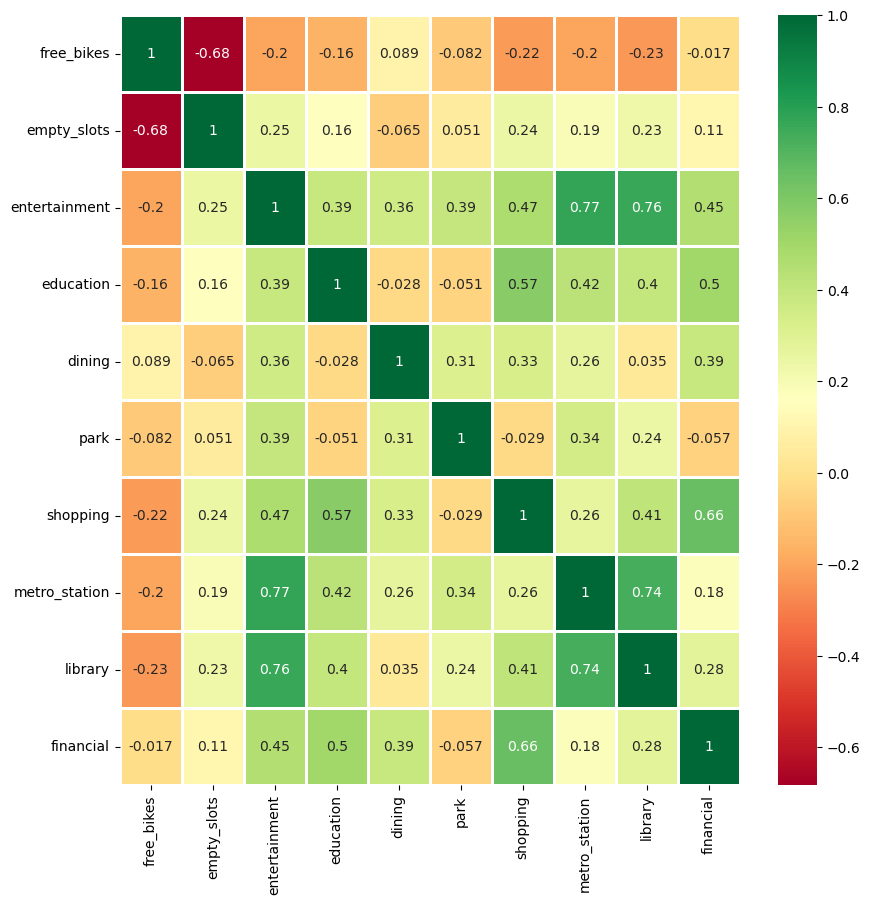

In [7]:
plt.figure(figsize = (10,10))
ax= sns.heatmap(df.corr(), annot = True, cmap="RdYlGn",linewidth =1)

According to the above figure, correlations between some of the independent variables are observed. The most effective independent variable on the target is empty_slots

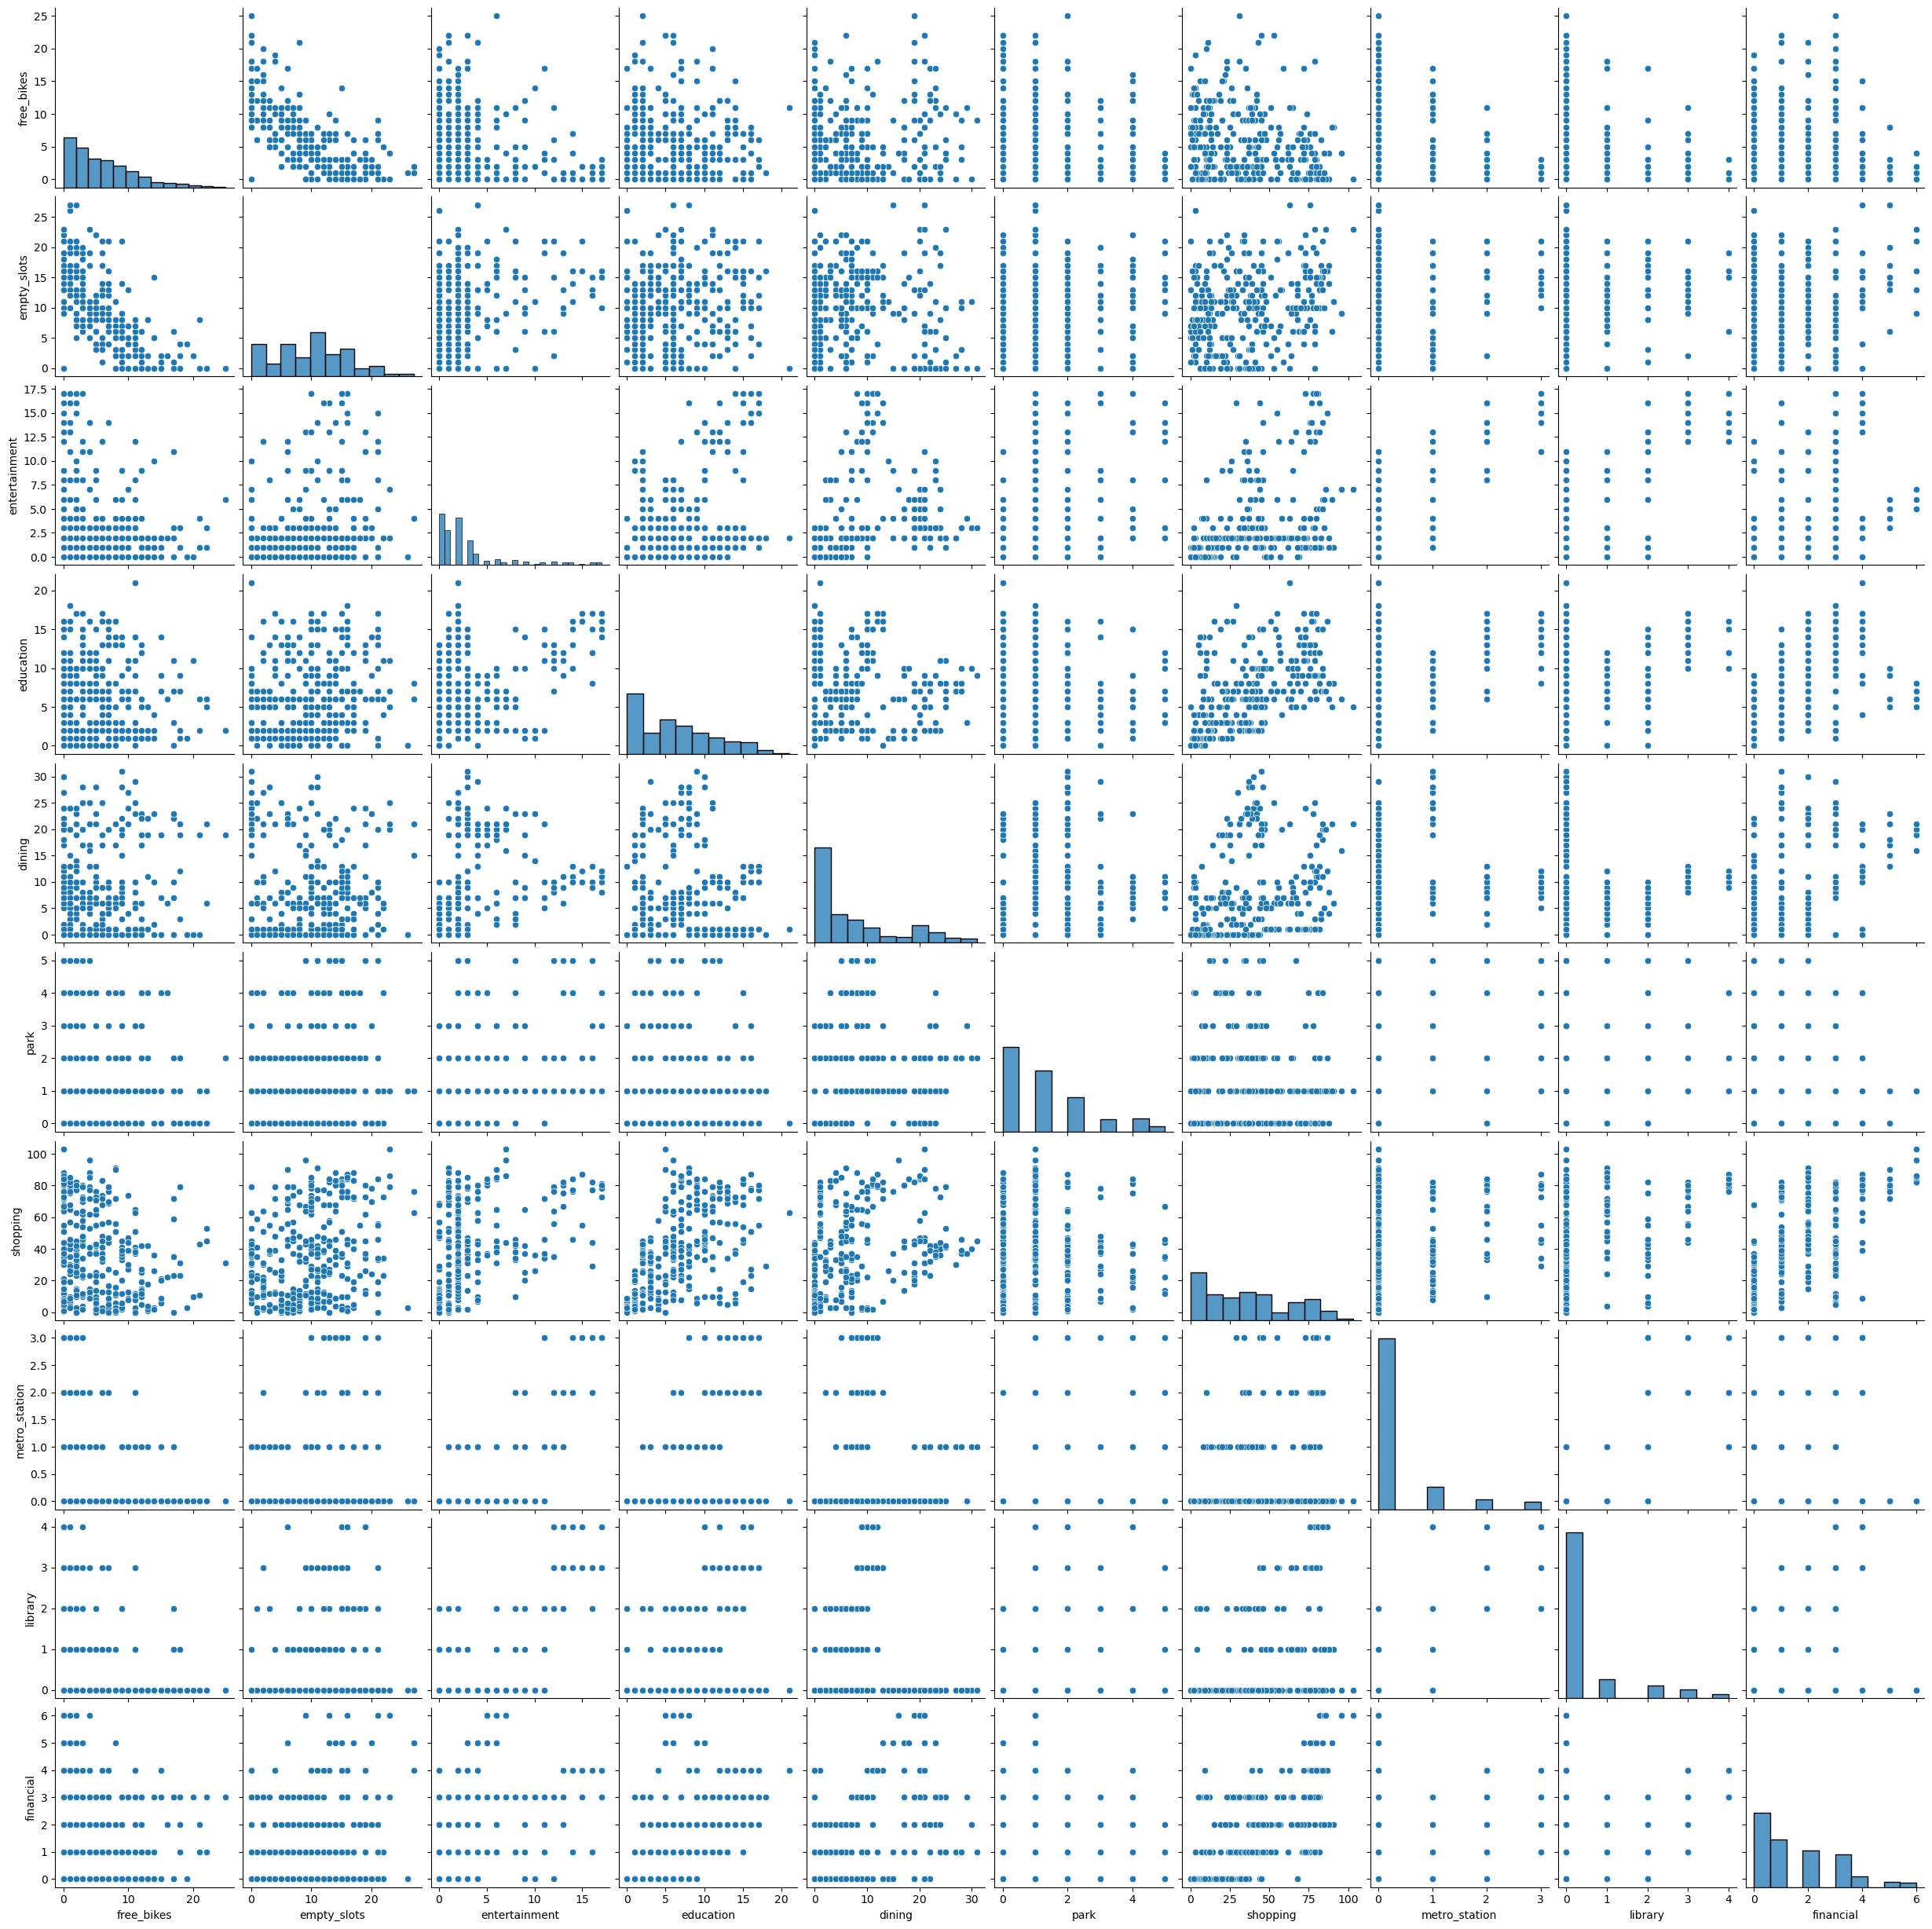

In [8]:
# PairPlot
df_col = df[['free_bikes','empty_slots','entertainment','education','dining','park','shopping','metro_station','library','financial']]
sns.pairplot(df_col)
plt.show()

<AxesSubplot:xlabel='free_bikes', ylabel='Count'>

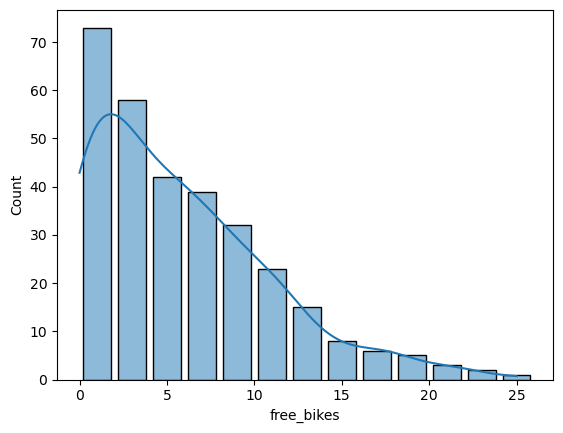

In [9]:
# Target Histogram and density function for target
sns.histplot(data = df['free_bikes'] , binwidth=2 , kde = True , shrink=.8 )

Target is skewed to the right.

<AxesSubplot:xlabel='uid', ylabel='free_bikes'>

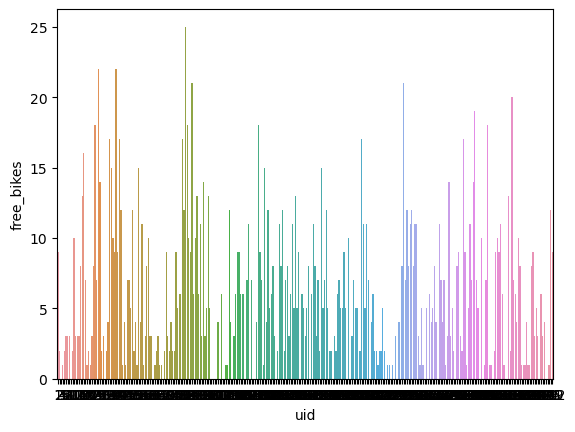

In [10]:
# Target Histogram
sns.barplot(data = df_bike_yelp , x = "uid" , y= "free_bikes" )

<AxesSubplot:>

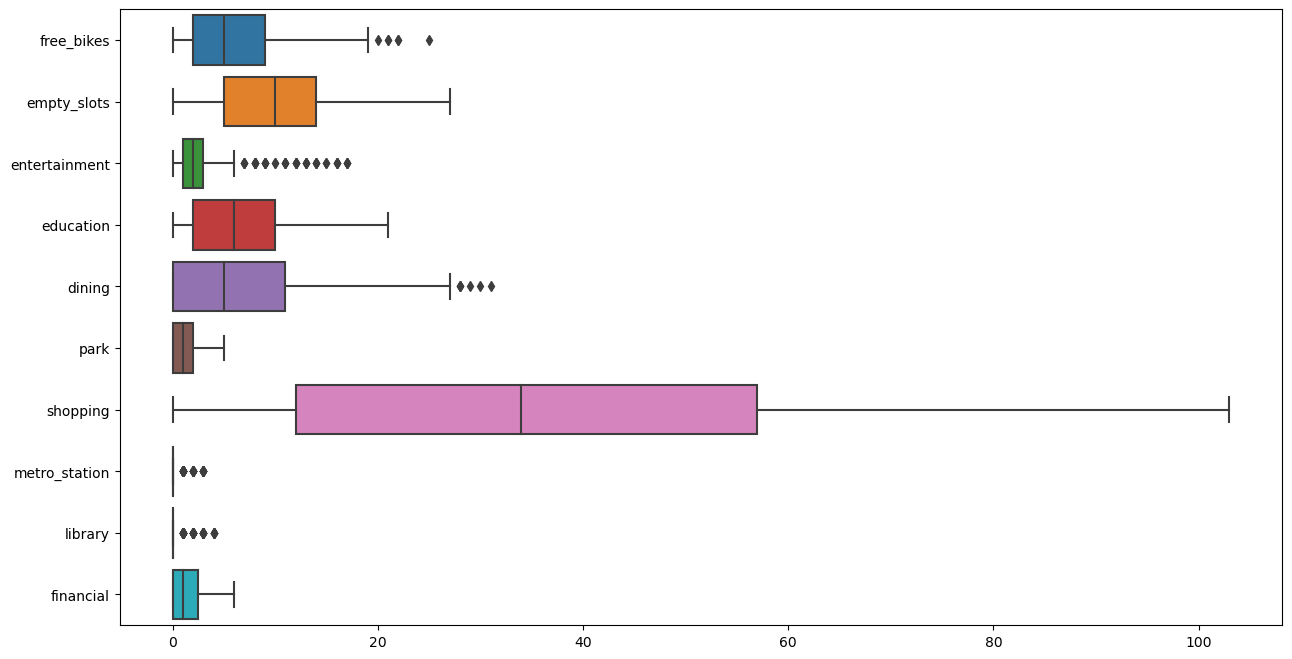

In [11]:
# Box Plot for all variables
plt.figure(figsize = (15,8))
sns.boxplot(data = df , orient = 'h' )

The boxplots show the outliers.

Following function is defined for detecting  outliers, and clipping them to upper and lower bounds.

In [12]:
# function for setting outliers to upper and lower bounds
def clip_outlier(d , threshold ):

    for c in d.columns:
        #if ( d[c].types == int ) | ( d[c].types == float ):
        L=d[c].mean()-threshold*d[c].std()
        U=d[c].mean()+threshold*d[c].std()
            
        # setting
        d[c]= d[c].clip(L,U)
    return d

# Setting upper and lower bounds
df_clipped = clip_outlier(df,1.5)


Target histogram after clipping outliers

<AxesSubplot:xlabel='free_bikes', ylabel='Count'>

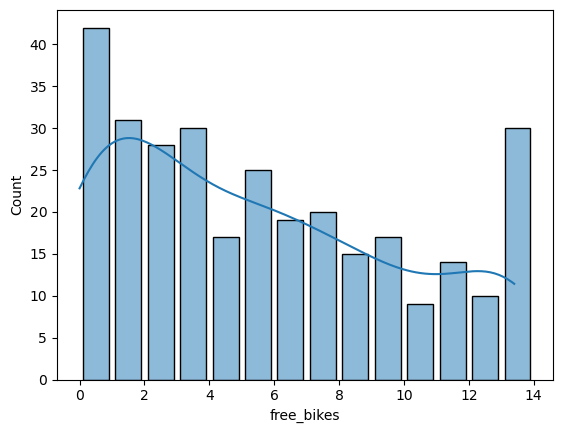

In [13]:
# Target Histogram for clipped data
sns.histplot(data = df_clipped['free_bikes'] , binwidth=1 , kde = True , shrink=.8 )

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Following cell converts collected data from CityBikes, FourSquare, and Yelp to an SQLite .db database. 

In [14]:
# Generating Database in SQLite3

import sqlite3 as sq
import pandas as pd

# This function created table using given fields and field types, and import CSV file to table
def Create_Table_import_csv(table_name,field_name,field_type,csv_file):

    # Fields and types
    name_type=''
    for i in range(len(field_name)):
        name_type= name_type + field_name[i] + ' ' +field_type[i] + ','
    name_type= name_type[0:len(name_type)-1]

    # Run create table sql query
    curs.execute("create table if not exists  "+ table_name +" ("+name_type+")")

    # Load CSV data into Pandas DataFrame
    table= pd.read_csv(csv_file)
 
    # Write the data to a sqlite db table
    table.to_sql(table_name, connection, if_exists='replace', index=False)
    
    return

# Database file name
database_filename='citybikes_foursquare-yelp.db'
database_info = [
                {'table'     : 'citybikes',
                 'field_name': ['uid' ,'name','longitude','latitude','free_bikes','empty_slots'],
                 'field_type': ['text','text','float'    ,'float'   ,'integer'   ,'integer'    ],
                 'csv_file'  : 'data/citybikes - (2023-02-25).csv'} ,

                {'table'     : 'foursquare',
                 'field_name': ['uid' ,'entertainment','education','dining' ,'park'   ,'shopping','metro_station','library','bank'   ,'atm'    ,'creditunion'],
                 'field_type': ['text','integer'      ,'integer'  ,'integer','integer','integer' ,'integer'      ,'integer','integer','integer','integer'    ],
                 'csv_file'  : 'data/FourSquare - (2023-02-25).csv'} ,

                {'table'     : 'yelp',
                 'field_name': ['uid' ,'entertainment','education','dining' ,'park'   ,'shopping','metro_station','library','financial'],
                 'field_type': ['text','integer'      ,'integer'  ,'integer','integer','integer' ,'integer'      ,'integer','integer'  ],
                 'csv_file'  : 'data/Yelp - (2023-02-25).csv'}                                 
                ]

# Create a connection object, Make a new db if not exist already and connect it, if exist then connect.
connection = sq.connect('data/'+database_filename) 
curs = connection.cursor()
print('Database '+database_filename+' created.')

for t in range(len(database_info)):
    Create_Table_import_csv(database_info[t]['table'],
                            database_info[t]['field_name'],
                            database_info[t]['field_type'],
                            database_info[t]['csv_file'])
    print('Table '+database_info[t]['table']+' created.')

# Close connection to SQLite database
connection.close()



Database citybikes_foursquare-yelp.db created.
Table citybikes created.
Table foursquare created.
Table yelp created.


#### Look at the data before and after the join to validate your data.
As an example, following cells show FourSquare data from Pandas dataframe, and created SQLite database. Comparing the results shows that they are the same.

In [15]:
# FourSquare Dataframe
df_foursquare

,uid,entertainment,education,dining,park,shopping,metro_station,library,bank,atm,creditunion
0,66,33,50,50,8,42,4,45,50,13,50
1,26,4,50,46,5,12,0,10,50,3,50
2,20,13,50,46,7,5,0,6,50,2,50
3,21,20,50,50,6,5,0,8,50,3,50
4,22,18,50,50,6,10,0,8,50,3,50
...,...,...,...,...,...,...,...,...,...,...,...
302,344,20,50,50,4,14,4,10,50,4,50
303,136,11,50,50,20,15,0,16,50,12,50
304,5,30,50,50,7,45,4,49,50,13,50
305,346,7,50,21,7,3,0,6,50,5,50


In [16]:
# SQLite Database
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")
  
connection = create_connection('data/'+'citybikes_foursquare-yelp.db') 
query = "SELECT * from foursquare"
table = execute_read_query(connection, query)

for record in table:
    print(record)

Connection to SQLite DB successful
(66, 33, 50, 50, 8, 42, 4, 45, 50, 13, 50)
(26, 4, 50, 46, 5, 12, 0, 10, 50, 3, 50)
(20, 13, 50, 46, 7, 5, 0, 6, 50, 2, 50)
(21, 20, 50, 50, 6, 5, 0, 8, 50, 3, 50)
(22, 18, 50, 50, 6, 10, 0, 8, 50, 3, 50)
(23, 17, 50, 50, 7, 24, 0, 7, 50, 5, 50)
(4, 31, 50, 50, 5, 45, 4, 49, 50, 12, 50)
(8, 19, 50, 50, 9, 11, 2, 34, 50, 9, 50)
(59, 9, 50, 46, 7, 7, 1, 23, 50, 6, 50)
(58, 6, 50, 18, 4, 2, 1, 27, 37, 3, 33)
(55, 3, 50, 36, 2, 2, 1, 27, 50, 3, 46)
(54, 4, 50, 41, 4, 2, 1, 15, 50, 3, 46)
(56, 11, 50, 50, 10, 17, 0, 23, 50, 8, 50)
(51, 6, 50, 27, 4, 3, 0, 5, 50, 5, 50)
(50, 27, 50, 50, 17, 8, 1, 12, 50, 4, 50)
(53, 4, 50, 50, 6, 4, 1, 14, 50, 4, 50)
(81, 9, 41, 50, 7, 11, 2, 5, 50, 5, 50)
(3, 29, 50, 50, 4, 44, 5, 46, 50, 12, 50)
(7, 5, 50, 38, 5, 1, 0, 17, 50, 2, 50)
(33, 30, 50, 50, 13, 14, 2, 7, 50, 2, 50)
(32, 15, 50, 50, 5, 12, 3, 11, 50, 2, 50)
(31, 21, 50, 50, 4, 17, 4, 7, 50, 4, 50)
(30, 20, 50, 50, 5, 17, 5, 7, 50, 5, 50)
(36, 35, 50, 50, 10, 17, 